# Using Torch-ResNet34

In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split, ConcatDataset
import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt

# Handle data

In [2]:
import random

stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
size = 224
batch_size=64
channels = 3

transformer_1 = T.Compose([
    T.Resize(size), 
    T.CenterCrop(size),
    T.ToTensor(),
    T.Normalize(*stats)
])

transformer_2 = T.Compose([
    T.Resize(size), 
    T.CenterCrop(size),
    T.RandomHorizontalFlip(),
    T.RandomRotation(10),
    T.RandomAutocontrast(p=2),
    T.RandomEqualize(p=2),
    T.ToTensor(),
    T.Normalize(*stats)
])

In [3]:
main_dir = "../data/imgs_face_clean_original/"
list_dir = sorted(os.listdir(main_dir))

print(f"Random data: {list_dir[0:5]}")
print(f"Number of classes: {len(list_dir)}")

Random data: ['.DS_Store', 'Adriana_Lima', 'Alex_Lawther', 'Alexandra_Daddario', 'Alvaro_Morte']
Number of classes: 106


In [4]:
dataset_1 = ImageFolder(main_dir, transform=transformer_1)
dataset_2 = ImageFolder(main_dir, transform=transformer_2)
classes = dataset_1.classes

print(f"Number of dataset1: {len(dataset_1)}")
print(f"Number of classes: {len(classes)}")
print(f"Size of image: {dataset_1[0][0].size()}")

Number of dataset1: 17534
Number of classes: 105
Size of image: torch.Size([3, 224, 224])


In [5]:
dataset = ConcatDataset([dataset_1, dataset_2])

print(f"Number of total data: {len(dataset)}")

Number of total data: 35068


In [6]:
def denormal(image):
    #Flip image
    image = image.numpy().transpose(1, 2, 0)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

def denormalize(x, mean=stats[0], std=stats[1]):
    # 3, H, W, B
    ten = x.clone().permute(1, 2, 3, 0)
    for t, m, s in zip(ten, mean, std):
        t.mul_(s).add_(m)
    # B, 3, H, W
    return torch.clamp(ten, 0, 1).permute(3, 0, 1, 2)

Text(0.5, 1.0, 'tom_ellis')

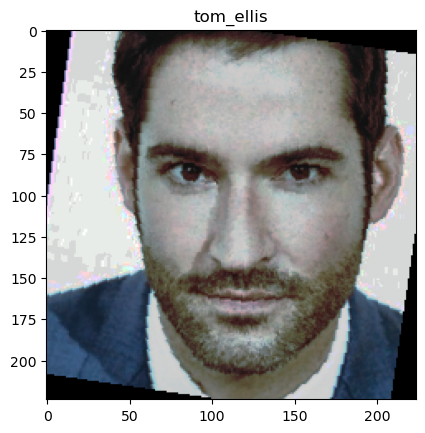

In [7]:
idx = -3
img, lbl = dataset[idx]

plt.imshow(denormal(img))
plt.title(classes[lbl])

## Split the data

In [12]:
torch.manual_seed(123)
val_len = int(len(dataset)*0.1)
print(f"Number of validation data: {val_len}")

dataset, val_ds = random_split(dataset, [len(dataset) - val_len, val_len])


Number of validation data: 3156


In [13]:
dl = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=3)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=True, pin_memory=False, num_workers=3)

In [14]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

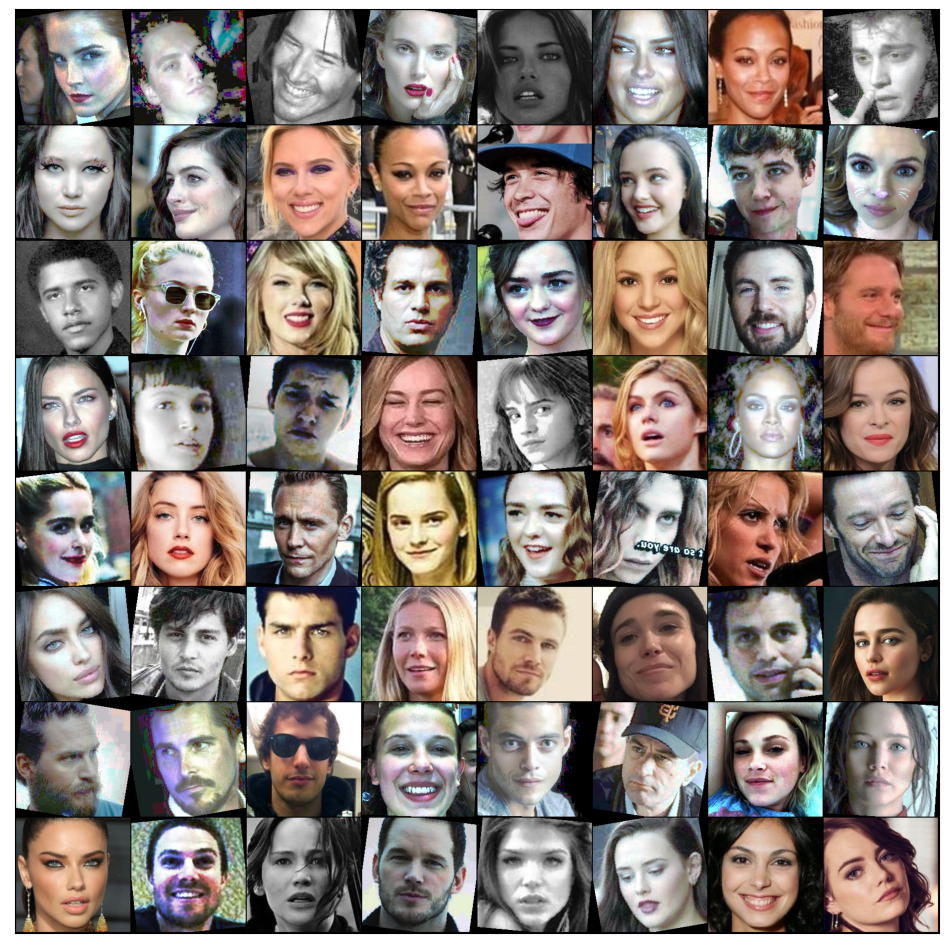

In [15]:
show_batch(dl)

In [16]:
device = torch.device("mps")
device

device(type='mps')

In [18]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='cpu')

In [19]:
torch.backends.mps.is_available()

False